In [1]:
import pandas as pd

df = pd.read_csv("data/merged_dengue_dataset.csv")
df.info()                                    # dtypes & non-null counts
df.describe()                                # summary statistics
df.isnull().sum()                            # count missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_code                    87 non-null     object 
 1   post_cases                      45 non-null     float64
 2   pre_cases                       72 non-null     float64
 3   post_genome_count               50 non-null     float64
 4   pre_genome_count                82 non-null     float64
 5   post_genomes_per_1000           45 non-null     float64
 6   pre_genomes_per_1000            72 non-null     float64
 7   post_median_turnaround_days     50 non-null     float64
 8   pre_median_turnaround_days      82 non-null     float64
 9   overall_median_turnaround_days  87 non-null     float64
 10  group                           83 non-null     object 
 11  income                          83 non-null     object 
 12  income_country_name             83 non

/Users/oliviawilko/anaconda3/envs/dengue_subsampler/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/oliviawilko/anaconda3/envs/dengue_subsampler/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/oliviawilko/anaconda3/envs/dengue_subsampler/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


country_code                       0
post_cases                        42
pre_cases                         15
post_genome_count                 37
pre_genome_count                   5
post_genomes_per_1000             42
pre_genomes_per_1000              15
post_median_turnaround_days       37
pre_median_turnaround_days         5
overall_median_turnaround_days     0
group                              4
income                             4
income_country_name                4
risk_country_name                 15
risk_Surveillance_score           15
risk_Total_population             15
risk_DCZ_pop_risk_mean            15
risk_DCZ_pop_risk_lower           15
risk_DCZ_pop_risk_upper           15
risk_YF_pop_risk_mean             15
risk_YF_pop_risk_lower            15
risk_YF_pop_risk_upper            15
rd_value                          30
gov_cc                             3
gov_ge                             3
gov_pv                             3
gov_rl                             3
g

In [3]:
import numpy as np

# all numeric for correlation / scatterplotting / VIF etc.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# all object (string) columns – probably categorical
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

df_num = df[num_cols]

In [8]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Count outliers per numeric column
outliers = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers in each numeric column:")
print(outliers)

Number of outliers in each numeric column:
post_cases                         8
pre_cases                         17
post_genome_count                  5
pre_genome_count                  11
post_genomes_per_1000              8
pre_genomes_per_1000               0
post_median_turnaround_days        3
pre_median_turnaround_days         7
overall_median_turnaround_days     3
risk_Surveillance_score            2
risk_Total_population             10
risk_DCZ_pop_risk_mean            11
risk_DCZ_pop_risk_lower           11
risk_DCZ_pop_risk_upper           11
risk_YF_pop_risk_mean             12
risk_YF_pop_risk_lower            12
risk_YF_pop_risk_upper            12
rd_value                           7
gov_cc                             1
gov_ge                             1
gov_pv                             0
gov_rl                             0
gov_rq                             4
gov_va                             0
physicians_physicians_per_1000     1
treatment_Publicfrac_pred       

/Users/oliviawilko/anaconda3/envs/dengue_subsampler/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


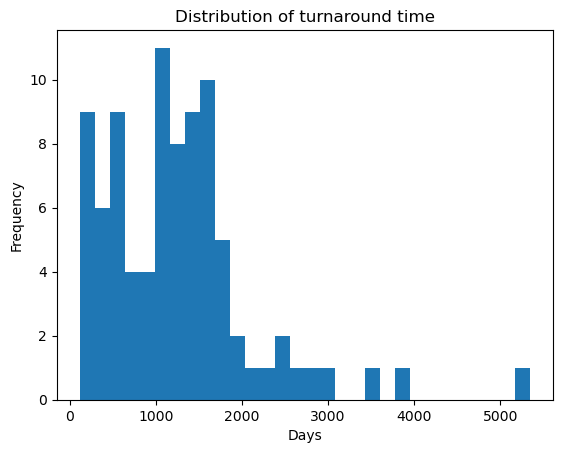

In [9]:
import matplotlib.pyplot as plt

plt.hist(df["overall_median_turnaround_days"], bins=30)
plt.title("Distribution of turnaround time")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

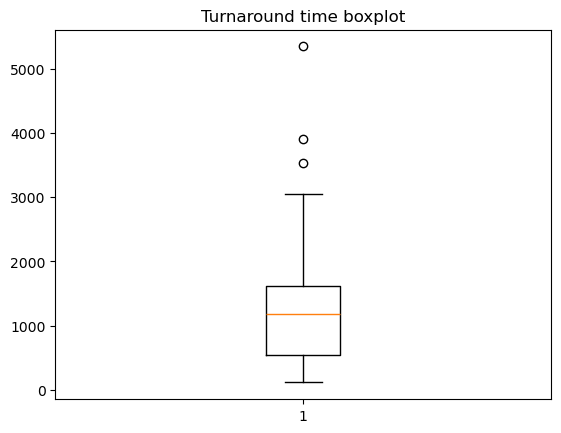

In [10]:
plt.boxplot(df["overall_median_turnaround_days"])
plt.title("Turnaround time boxplot")
plt.show()

In [11]:
from scipy.stats import shapiro
stat, p = shapiro(df["overall_median_turnaround_days"])
print("Shapiro-Wilk p‐value:", p)

Shapiro-Wilk p‐value: 2.959691018019833e-07


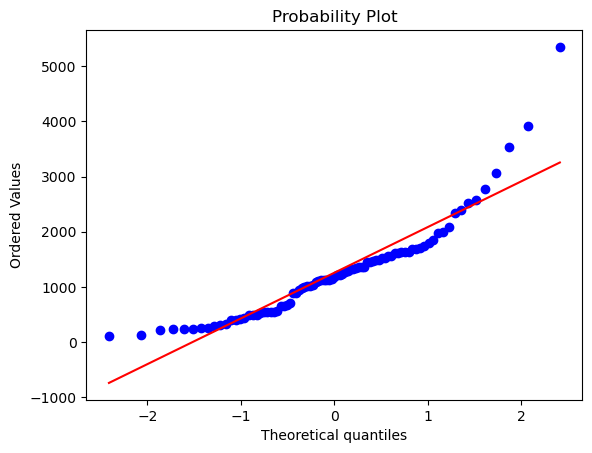

In [12]:
import scipy.stats as stats
stats.probplot(df["overall_median_turnaround_days"], dist="norm", plot=plt)
plt.show()

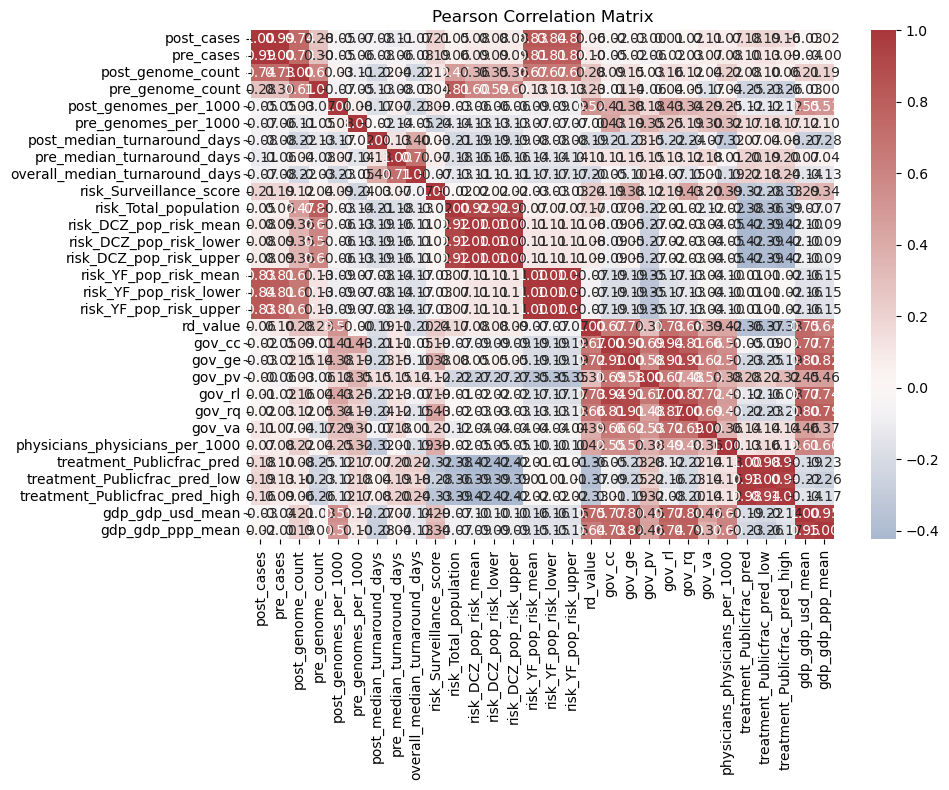

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix & heatmap
corr_pearson = df[num_cols].corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()